# Statistic comparison between Backpropagation, Metaheuristics and Random Search.
In this notebook we will statistically compare methods for optimizing weights in neural network.  
In the project where this notebook is included, there are different implementations for weight optimization, backpropagation, genetic algoritm, evolutive strategies, simulated annealing and random search, all of which have their unique way of finding out global minima.  
If the reader only wants the results, in the base directory of the project it is located a file called statistic_analysis.py that executes the analysis that we are going to tackle in this notebook.
The rest of the notebook consists of a little explanation of the network optimization procedure, the statisctic analysis and conclusions and further implications.  
## Network optimization techniques

Backpropagation is an stochastic gradient descent method that computes the gradient of the starting point in the search space and consistently moves the solution towards the steepest descending in the search space. This movement is controlled by the learning rate hyperparameter that ensembles the size of the step that the algorithm moves each epoch the solution towards the minimum. This method has some downsides, the principal one being the local minima trapping, where, once the algorithm finds the local minima it stops searching and just converges there. In metaheuristics terms, this method has a very large intensification/exploration ratio, since the exloring phase ends when a significant downhill is goind by the algorithm.  
In the field of metaheuristics, in this project we find 3 different ones.  
Genetic algorithms take the Mendel's laws, Darwin's natural selection and biologic mutations and apply them to the algorithms field.  
Inially the algorithm starts with a population formed by encoded solutions for a problem (i.e. weights and biases vectors for a neural network) and take different operators, ones that mutate the solution, others that perform "natural" selection to the population of the solutions and some that joins solutions to create new ones, as Mendel did with peas. Making this modifications over certain epochs, make a more efective algorithm to navigate over the search space since we navigate with different individuals and cover different spaces over the iterations of the algorithm.
Simulated annealing takes the process of the crystal controlled cooling and apply it to the navigation of the solution search space.  It uses a temperature parameter, that controls the region of the search space that is available for the solution to be selected as the new solution. 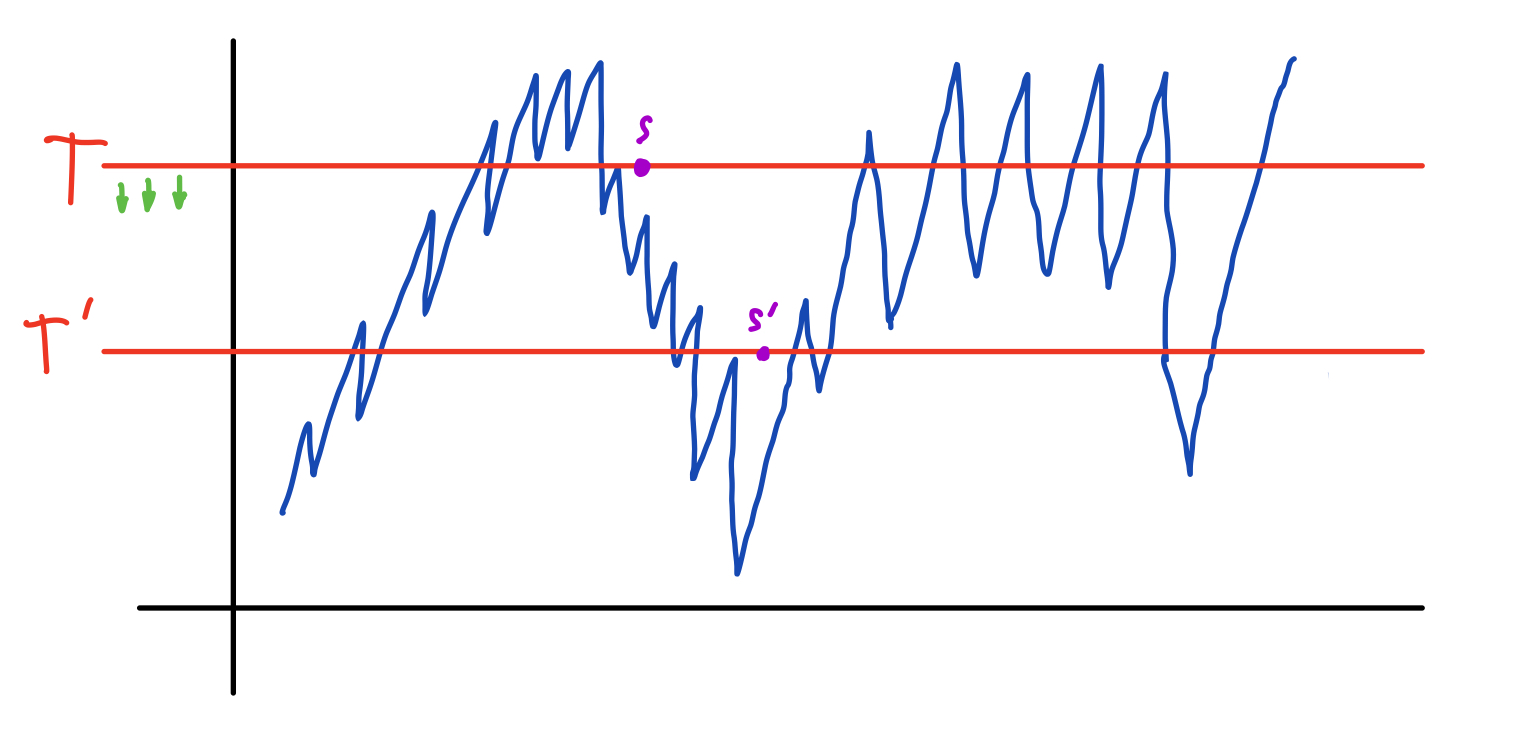 

In the image above we find a graphical representation of the search space. At T temperature, all the space that is below that line is taken as a valid solution. However, every iteration of the training loop that temperature decreases at some rate. At T' time, we reduce the search space where valid solutions are taken, forcing the search of the optimal weights.  
Evolutive strategies are.... (to be completed)
Random search is a method that is very simple and depending on the case, could be better than these techniques. The algorithm samples a random point every iteration of the loop, if the point has a lower objective function value than the best until that moment, the algorithm keeps the point, otherwise is discarded.  
## Statistic analysis.
In this section of the notebook we are going to revise how the methods explained above perform over the training phase of the neural network. We are not taking into account the test phase where we see how the trained network perform over different data.  

In [2]:
#Configure Jupyter to use correctly the path related to the code
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from neuroevolution.networks.basic_neural_network import BasicNeuralNetwork
from neuroevolution.networks.genetic_neural_network import GeneticNeuralNetwork
from neuroevolution.networks.annealed_neural_network import AnnealedNeuralNetwork
from neuroevolution.networks.strategy_neural_network import StrategyNeuralNetwork
from neuroevolution.networks.random_search_nn import RandomSearchNeuralNetwork
import numpy as np
import statistics
basic_loss = []
genetic_loss = []
annealed_loss = []
random_loss = []
epochs = 100
number_of_experiments = 32

In the code cell above we are setting up the conditions for the experiment, we declare the loss lists where we will append the loss resulting of every execution of the different neural networks. We also set up the epochs and the number of experiments that are going to be taken by the different neural network implementations.

In [3]:
if __name__ == "__main__":
  feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
  labels = np.array([[1,0,0,1,1]])
  labels = labels.reshape(5,1)
  for i in range(number_of_experiments):
    print("Epoch: {}".format(i))
    # Basic Neural Network Execution
    nnet = BasicNeuralNetwork(layers=[3,1], input_size=3, num_of_classes= 1)
    nnet.train(feature_set,labels,epochs)
    basic_loss.append(nnet.loss[-1])
    # Genetic Neural Network Execution
    nnet = GeneticNeuralNetwork(layers=[3,1], input_size=3, num_of_classes= 1)
    nnet.train(feature_set,labels,epochs)
    genetic_loss.append(nnet.population[
          list(nnet.population.keys())[0] ]['loss'])
    # Annealed Neural Network Execution
    nnet = AnnealedNeuralNetwork(layers=[3,1], input_size=3, num_of_classes= 1)
    nnet.train(feature_set,labels,epochs)
    annealed_loss.append(nnet.loss[-1])
    # Random Neural Network Execution
    nnet = RandomSearchNeuralNetwork(layers=[3,1], input_size=3, num_of_classes= 1)
    nnet.train(feature_set,labels,epochs)
    random_loss.append(nnet.loss[-1])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31


In the code cell above we perform the experiments and take the loss of every of the networks per experiment. Once we have the loss data in the correct arrays, we then perform a basic statistic analysis.

In [4]:
  print("Basic Neural Network: ")
  print("Mean: {}".format(str(statistics.mean(basic_loss))))
  print("Variance: {}".format(str(statistics.variance(basic_loss))))
  print("Std Deviation: {}".format(str(statistics.stdev(basic_loss))))
  print('------')
  print("Genetic Neural Network: ")
  print("Mean: {}".format(str(statistics.mean(genetic_loss))))
  print("Variance: {}".format(str(statistics.variance(genetic_loss))))
  print("Std Deviation: {}".format(str(statistics.stdev(genetic_loss))))
  print('------')
  print("Annealed Neural Network: ")
  print("Mean: {}".format(str(statistics.mean(annealed_loss))))
  print("Variance: {}".format(str(statistics.variance(annealed_loss))))
  print("Std Deviation: {}".format(str(statistics.stdev(annealed_loss))))
  print('------')
  print("Random Search Neural Network: ")
  print("Mean: {}".format(str(statistics.mean(random_loss))))
  print("Variance: {}".format(str(statistics.variance(random_loss))))
  print("Std Deviation: {}".format(str(statistics.stdev(random_loss))))
  print('------')

Basic Neural Network: 
Mean: 0.19614608277401444
Variance: 0.0005337265648968293
Std Deviation: 0.023102522911942525
------
Genetic Neural Network: 
Mean: 0.3216849660275721
Variance: 0.0013991156995812942
Std Deviation: 0.0374047550397178
------
Annealed Neural Network: 
Mean: 0.6060162278016253
Variance: 0.0023837528269404587
Std Deviation: 0.04882369124657064
------
Random Search Neural Network: 
Mean: 0.31913705308247464
Variance: 0.003609115824185757
Std Deviation: 0.060075917173071584
------


In the code cell above we perform a basic analysis of the neural network losses, extracting the mean, variance and standard deviation.
## Results.
To be continued